In [1]:
import sys
sys.path.append('../')
from src.models.linear_regression.closed_form import linear_regression_closed_form
from src.models.linear_regression.gradient_descent_base import linear_regression_gradient_descent
from src.models.linear_regression.lasso_gradient_descent import linear_regression_gradient_descent_lasso
from src.models.linear_regression.ridge_gradient_descent import linear_regression_gradient_descent_ridge
from src.utils.split_data import split_train_val_test 
from src.utils.metrics import mean_squared_error_2, mean_absolute_error_2
#####################################################################################################
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#####################################################################################################
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PowerTransformer, StandardScaler



In [2]:
df=pd.read_csv('../data/raw/California_Houses.csv')
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [3]:
y=df['Median_House_Value']
df=df.drop(columns=['Median_House_Value'])


X_train, X_val, X_test, y_train, y_val, y_test = split_train_val_test(df,y,random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (14447, 13) (14447,)
Validation: (3096, 13) (3096,)
Test: (3097, 13) (3097,)


In [4]:
X_train.shape

(14447, 13)

In [5]:
X_test.shape

(3097, 13)

In [6]:
X_val.shape

(3096, 13)

# Preprocessing

In [7]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
import pandas as pd

cols_to_power = [
    'Distance_to_coast',
    'Median_Income',
    'Tot_Rooms',
    'Tot_Bedrooms',
    'Population',
    'Households'
]

pt = PowerTransformer(method='yeo-johnson')
X_train_pt = X_train.copy()
X_train_pt[cols_to_power] = pt.fit_transform(X_train[cols_to_power])

X_val_pt = X_val.copy()
X_val_pt[cols_to_power] = pt.transform(X_val[cols_to_power])

X_test_pt = X_test.copy()
X_test_pt[cols_to_power] = pt.transform(X_test[cols_to_power])
#########################################
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()


X_train_scaled = X_train_pt.copy()
X_train_scaled[X_train_scaled.columns] = scaler.fit_transform(X_train_pt)


X_val_scaled = X_val_pt.copy()
X_val_scaled[X_val_scaled.columns] = scaler.transform(X_val_pt)

X_test_scaled = X_test_pt.copy()
X_test_scaled[X_test_scaled.columns] = scaler.transform(X_test_pt)



from sklearn.preprocessing import StandardScaler
import pandas as pd


y_scaler = StandardScaler()

y_train = pd.Series(
    y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten(),
    index=y_train.index,
    name=y_train.name
)

y_val = pd.Series(
    y_scaler.transform(y_val.values.reshape(-1, 1)).flatten(),
    index=y_val.index,
    name=y_val.name
)

y_test = pd.Series(
    y_scaler.transform(y_test.values.reshape(-1, 1)).flatten(),
    index=y_test.index,
    name=y_test.name
)









In [8]:
y_train

20046   -1.383333
3024    -1.399814
15663    2.539847
20484    0.099023
9814     0.614249
           ...   
15308   -0.192417
3161    -1.207255
2630    -1.293126
18443    0.295052
3174    -0.929692
Name: Median_House_Value, Length: 14447, dtype: float64

In [9]:
X_train_scaled

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20046,-1.537647,-0.292327,-0.493990,-0.278847,0.230596,-0.221795,0.209041,0.274761,1.843408,-0.137450,0.044425,-0.260775,-0.115875
3024,-0.700725,0.104386,0.442045,0.671771,0.407974,0.502607,-0.222522,0.049720,1.145568,-0.418905,-0.182960,-0.104978,0.030011
15663,-0.014038,1.849920,0.849314,1.501858,0.140556,1.341682,1.025257,-1.440556,-2.962798,1.192781,1.193505,-1.286457,-1.537317
20484,1.089351,-0.927066,0.496376,0.177223,0.540816,0.246810,-0.625939,0.419788,0.279046,-0.879629,-0.587086,0.432122,0.495937
9814,0.135076,0.421756,0.113035,-0.023637,-0.159709,0.030129,0.471731,-1.185509,-1.129066,0.695681,0.758704,-1.245173,-1.006978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15308,0.392877,0.739126,-1.174367,-0.984907,-1.162587,-0.962489,-1.137247,1.094913,-0.537500,-0.576610,-1.174920,1.228420,1.187363
3161,-1.441123,-0.212984,-0.382488,-0.336103,0.038987,-0.086186,-0.180304,0.354776,1.418868,-0.508667,-0.262420,0.042330,0.156605
2630,-1.570950,0.263071,-0.761689,-0.419532,-0.870014,-0.617613,2.409071,-2.325720,-3.099729,2.607875,2.405411,0.363134,-0.093045
18443,0.857422,-0.292327,0.927174,0.522668,0.935415,0.673798,0.767257,-1.130499,0.392876,0.860714,0.909732,-1.558694,-1.232224


In [10]:
X_val_scaled

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
2565,-0.216800,0.977153,-0.028476,-0.312977,-0.372243,-0.261285,2.423144,-2.295714,-1.477906,2.606377,2.404068,0.365720,-0.089462
18474,0.224052,-0.689039,1.102024,1.134551,1.272154,1.164994,0.710967,-1.050484,0.263542,0.782036,0.842694,-1.469922,-1.154644
1203,-0.880338,-0.133642,0.256250,-0.040022,-0.111536,-0.035974,1.766418,-1.090491,1.626037,1.625479,1.561896,-0.563648,-0.796738
6413,1.388768,0.421756,0.387188,0.040490,0.178400,0.130113,-0.705684,0.764852,0.575261,-1.000764,-0.764890,0.689915,0.719953
17074,-0.389004,-0.689039,-1.750414,-0.967816,-1.607586,-0.892136,0.875148,-1.325535,-1.264506,1.032092,1.055222,-1.463034,-1.397277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,1.783580,0.421756,0.415848,-0.113903,-0.384161,-0.198499,0.767257,-1.235518,0.162564,0.913161,0.952847,-1.540713,-1.277001
11950,0.243267,0.104386,0.466885,0.209198,0.364345,0.283236,-0.785430,1.059906,0.810660,-0.780340,-0.890042,0.927014,0.925185
18689,0.674720,-0.768381,0.689889,0.522668,1.358130,0.563856,0.631221,-1.095492,-0.481979,0.749820,0.812650,-1.410794,-1.115112
4214,-1.083856,1.453208,-0.609821,-0.309152,0.355302,-0.004379,-0.696303,0.644830,0.144935,-1.048228,-0.719292,0.613933,0.654057


In [11]:
X_test_scaled

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
15193,1.322107,-1.006409,0.395047,-0.040022,-0.133513,0.097351,-1.212301,1.259943,0.076388,-0.439668,-1.242355,1.382858,1.321445
1401,0.595366,0.818468,0.018227,-0.201665,-0.210541,-0.122883,1.095620,-1.255522,-0.530474,1.156152,1.164716,-1.289072,-1.400417
12828,0.283712,-0.371669,-0.007569,-0.271350,-0.059584,-0.237490,1.447437,-0.945464,1.018496,1.308922,1.293006,-0.890911,-1.014213
3253,-0.979095,-0.847724,-0.816404,-0.407367,-0.087279,-0.432763,0.185586,-0.280342,1.286443,0.035938,0.207821,-0.616913,-0.414620
19238,0.560099,-0.371669,0.147954,0.053055,-0.236501,-0.057331,1.372383,-1.530573,0.605795,1.484850,1.445669,-0.929002,-1.202754
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.319999,0.501098,-0.651906,-1.055195,-0.795970,-0.886407,-0.860484,0.799858,-0.413571,-0.922535,-0.886061,0.835355,0.846215
11964,-0.301247,0.342413,0.512678,0.358899,0.584435,0.100652,-0.747902,1.064907,0.925358,-0.780629,-0.860343,0.901579,0.902869
5390,-0.384738,0.580441,-0.045644,0.356229,0.587131,0.342520,-0.743212,0.589819,-0.491185,-1.032755,-0.729996,0.622398,0.661233
860,1.082255,-1.085751,0.740501,0.429648,0.605903,0.433921,0.922057,-1.200512,-0.351720,1.004151,1.033707,-1.483540,-1.362556


# Modeling

## Baseline models 

### MODEL 1: MY CLOSED_FORM (all features)

In [12]:
model1_my_closed_form= linear_regression_closed_form()
model1_my_closed_form.fit(X_train_scaled,y_train)


In [13]:
pred_train_model1=model1_my_closed_form.predict(X_train_scaled)
pred_val_model1=model1_my_closed_form.predict(X_val_scaled)
pred_test_model1=model1_my_closed_form.predict(X_test_scaled)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("################## TRAIN #####################")
print("MAE:", mean_absolute_error(y_train, pred_train_model1))
print("MSE:", mean_squared_error(y_train, pred_train_model1))

print("\n################## VALIDATION #####################")
print("MAE:", mean_absolute_error(y_val, pred_val_model1))
print("MSE:", mean_squared_error(y_val, pred_val_model1))

print("\n################## TEST #####################")
print("MAE:", mean_absolute_error(y_test, pred_test_model1))
print("MSE:", mean_squared_error(y_test, pred_test_model1))


################## TRAIN #####################
MAE: 0.4490390201735744
MSE: 0.35783075050647745

################## VALIDATION #####################
MAE: 0.4460110671639358
MSE: 0.34086411026949437

################## TEST #####################
MAE: 0.46286534820987474
MSE: 0.38733770395201156


### MODEL 2: MY CLOSED_FORM (dropped features)

In [15]:
cols_to_drop = [
     'Tot_Bedrooms', 'Tot_Rooms', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco','Longitude'
]

X_train_scaled_droped = X_train_scaled.drop(columns=cols_to_drop)
X_val_scaled_droped = X_val_scaled.drop(columns=cols_to_drop)
X_test_scaled_droped = X_test_scaled.drop(columns=cols_to_drop)




In [16]:
model2_my_closed_form= linear_regression_closed_form()
model2_my_closed_form.fit(X_train_scaled_droped,y_train)

In [17]:
pred_train_model2=model2_my_closed_form.predict(X_train_scaled_droped)
pred_val_model2=model2_my_closed_form.predict(X_val_scaled_droped)
pred_test_model2=model2_my_closed_form.predict(X_test_scaled_droped)

In [18]:
print("################## TRAIN #####################")
print("MAE:", mean_absolute_error_2(y_train, pred_train_model2))
print("MSE:", mean_squared_error_2(y_train, pred_train_model2))
print("\n################## VALIDATION #####################")
print("MAE:", mean_absolute_error_2(y_val, pred_val_model2))
print("MSE:", mean_squared_error_2(y_val, pred_val_model2))
print("\n################## TEST #####################")
print("MAE:", mean_absolute_error_2(y_test, pred_test_model2))
print("MSE:", mean_squared_error_2(y_test, pred_test_model2))


################## TRAIN #####################
MAE: 0.4693428009799008
MSE: 0.388385914520206

################## VALIDATION #####################
MAE: 0.46459678002836685
MSE: 0.3718552621398819

################## TEST #####################
MAE: 0.48083893472499756
MSE: 0.4157121474639904


### MODEL 3: SKLEARN CLOSED_FORM (all features)

In [19]:
from sklearn.linear_model import LinearRegression

model3_sklearn_closed_form = LinearRegression()

model3_sklearn_closed_form.fit(X_train_scaled, y_train)

pred_train_model3 = model3_sklearn_closed_form.predict(X_train_scaled)
pred_val_model3 = model3_sklearn_closed_form.predict(X_val_scaled)
pred_test_model3 = model3_sklearn_closed_form.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("################## TRAIN #####################")
print("MAE:", mean_absolute_error(y_train, pred_train_model3))
print("MSE:", mean_squared_error(y_train, pred_train_model3))

print("\n################## VALIDATION #####################")
print("MAE:", mean_absolute_error(y_val, pred_val_model3))
print("MSE:", mean_squared_error(y_val, pred_val_model3))

print("\n################## TEST #####################")
print("MAE:", mean_absolute_error(y_test, pred_test_model3))
print("MSE:", mean_squared_error(y_test, pred_test_model3))


################## TRAIN #####################
MAE: 0.4490390201735745
MSE: 0.35783075050647745

################## VALIDATION #####################
MAE: 0.4460110671639359
MSE: 0.34086411026949426

################## TEST #####################
MAE: 0.4628653482098747
MSE: 0.38733770395201134


### MODEL 4: SKLEARN CLOSED_FORM (dropped features)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model4_sklearn_closed_form = LinearRegression()
model4_sklearn_closed_form.fit(X_train_scaled_droped, y_train)

pred_train_model4 = model4_sklearn_closed_form.predict(X_train_scaled_droped)
pred_val_model4 = model4_sklearn_closed_form.predict(X_val_scaled_droped)
pred_test_model4 = model4_sklearn_closed_form.predict(X_test_scaled_droped)


print("################## TRAIN #####################")
print("MAE:", mean_absolute_error(y_train, pred_train_model4))
print("MSE:", mean_squared_error(y_train, pred_train_model4))

print("\n################## VALIDATION #####################")
print("MAE:", mean_absolute_error(y_val, pred_val_model4))
print("MSE:", mean_squared_error(y_val, pred_val_model4))

print("\n################## TEST #####################")
print("MAE:", mean_absolute_error(y_test, pred_test_model4))
print("MSE:", mean_squared_error(y_test, pred_test_model4))


################## TRAIN #####################
MAE: 0.4693428009799007
MSE: 0.38838591452020604

################## VALIDATION #####################
MAE: 0.4645967800283668
MSE: 0.3718552621398819

################## TEST #####################
MAE: 0.48083893472499756
MSE: 0.4157121474639903


### MODEL 5: MY Basic GD (all features)

In [21]:
model5_my_basic_gradient_descent = linear_regression_gradient_descent(iterations=1000)

model5_my_basic_gradient_descent.fit(X_train_scaled, y_train)

pred_train_model5 = model5_my_basic_gradient_descent.predict(X_train_scaled)
pred_val_model5 = model5_my_basic_gradient_descent.predict(X_val_scaled)
pred_test_model5 = model5_my_basic_gradient_descent.predict(X_test_scaled)

print("################## MODEL 5: ALL FEATURES #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model5))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model5))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model5))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model5))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model5))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model5))

################## MODEL 5: ALL FEATURES #####################
TRAIN MAE: 0.45814737007116546
TRAIN MSE: 0.3697818138251737
VALIDATION MAE: 0.4568978654930041
VALIDATION MSE: 0.3560298370785626
TEST MAE: 0.47065123886812593
TEST MSE: 0.39591964880872904


### MODEL 6: MY Basic GD (dropped features)

In [22]:
model6_my_basic_gradient_descent = linear_regression_gradient_descent(iterations=1000)
model6_my_basic_gradient_descent.fit(X_train_scaled_droped, y_train)


pred_train_model6 = model6_my_basic_gradient_descent.predict(X_train_scaled_droped)
pred_val_model6 = model6_my_basic_gradient_descent.predict(X_val_scaled_droped)
pred_test_model6 = model6_my_basic_gradient_descent.predict(X_test_scaled_droped)

print("\n################## MODEL 6: DROPPED COLUMNS #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model6))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model6))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model6))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model6))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model6))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model6))


################## MODEL 6: DROPPED COLUMNS #####################
TRAIN MAE: 0.473665481478821
TRAIN MSE: 0.3969199660252751
VALIDATION MAE: 0.4717052431525312
VALIDATION MSE: 0.38363553933798017
TEST MAE: 0.48272596177442856
TEST MSE: 0.4194213379131731


### MODEL 7: SGDRegressor (all features) 

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


model7_sklearn_gradient_descent = SGDRegressor(
    max_iter=1000,     
    tol=1e-3,         
           alpha=0.0,     
     
    random_state=42
)


model7_sklearn_gradient_descent.fit(X_train_scaled, y_train)

pred_train_model7 = model7_sklearn_gradient_descent.predict(X_train_scaled)
pred_val_model7 = model7_sklearn_gradient_descent.predict(X_val_scaled)
pred_test_model7 = model7_sklearn_gradient_descent.predict(X_test_scaled)

print("################## MODEL 7: SGD (ALL FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model7))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model7))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model7))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model7))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model7))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model7))



################## MODEL 7: SGD (ALL FEATURES) #####################
TRAIN MAE: 0.4498276544405565
TRAIN MSE: 0.3597818166385498
VALIDATION MAE: 0.4481324036367169
VALIDATION MSE: 0.3448885016772517
TEST MAE: 0.4632172328143263
TEST MSE: 0.3895115728994916


### MODEL 8: SGDRegressor (dropped features)

In [24]:
model8_sklearn_gradient_descent = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    penalty='l2',
        alpha=0.0,     

    random_state=42
)

model8_sklearn_gradient_descent.fit(X_train_scaled_droped, y_train)


pred_train_model8 = model8_sklearn_gradient_descent.predict(X_train_scaled_droped)
pred_val_model8 = model8_sklearn_gradient_descent.predict(X_val_scaled_droped)
pred_test_model8 = model8_sklearn_gradient_descent.predict(X_test_scaled_droped)


print("\n################## MODEL 8: SGD (DROPPED COLUMNS) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model8))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model8))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model8))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model8))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model8))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model8))


################## MODEL 8: SGD (DROPPED COLUMNS) #####################
TRAIN MAE: 0.4684618624704871
TRAIN MSE: 0.38869189531632115
VALIDATION MAE: 0.4638989293973553
VALIDATION MSE: 0.37207976700448897
TEST MAE: 0.4803146140321634
TEST MSE: 0.4168465694469633


### MODEL 9: MY LASSO GD (all features) 

In [25]:
model9_my_lasso_gd = linear_regression_gradient_descent_lasso(
    iterations=1000,
    learning_rate=0.01,
    lambda_param=0.1  
)


model9_my_lasso_gd.fit(X_train_scaled, y_train)


pred_train_model9 = model9_my_lasso_gd.predict(X_train_scaled)
pred_val_model9 = model9_my_lasso_gd.predict(X_val_scaled)
pred_test_model9 = model9_my_lasso_gd.predict(X_test_scaled)

print("################## MODEL 9: LASSO GD (ALL FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model9))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model9))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model9))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model9))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model9))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model9))




################## MODEL 9: LASSO GD (ALL FEATURES) #####################
TRAIN MAE: 0.4581487439058685
TRAIN MSE: 0.36978553457762203
VALIDATION MAE: 0.4568991559554448
VALIDATION MSE: 0.35603363897552276
TEST MAE: 0.47065164238629525
TEST MSE: 0.39592184504328215


### MODEL 10: MY LASSO GD (dropped features)

In [26]:
model10_my_lasso_gd = linear_regression_gradient_descent_lasso(
    iterations=1000,
    learning_rate=0.01,
    lambda_param=0.1
)


model10_my_lasso_gd.fit(X_train_scaled_droped, y_train)

pred_train_model10 = model10_my_lasso_gd.predict(X_train_scaled_droped)
pred_val_model10 = model10_my_lasso_gd.predict(X_val_scaled_droped)
pred_test_model10 = model10_my_lasso_gd.predict(X_test_scaled_droped)

print("\n################## MODEL 10: LASSO GD (DROPPED COLUMNS) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model10))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model10))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model10))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model10))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model10))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model10))


################## MODEL 10: LASSO GD (DROPPED COLUMNS) #####################
TRAIN MAE: 0.4736672520765031
TRAIN MSE: 0.39692341613523013
VALIDATION MAE: 0.4717074154318441
VALIDATION MSE: 0.38363942592246386
TEST MAE: 0.4827268944070502
TEST MSE: 0.4194236388223099


### MODEL 11: SKLEARN LASSO GD (ALL FEATURES) 

In [27]:


model11_sklearn_lasso_gd = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    penalty='l1',  
    alpha=0.1,         
    learning_rate='constant',
    eta0=0.01,       
    random_state=42
)

model11_sklearn_lasso_gd.fit(X_train_scaled, y_train)

pred_train_model11 = model11_sklearn_lasso_gd.predict(X_train_scaled)
pred_val_model11 = model11_sklearn_lasso_gd.predict(X_val_scaled)
pred_test_model11 = model11_sklearn_lasso_gd.predict(X_test_scaled)

print("################## MODEL 11: SKLEARN LASSO GD (ALL FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model11))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model11))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model11))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model11))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model11))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model11))





################## MODEL 11: SKLEARN LASSO GD (ALL FEATURES) #####################
TRAIN MAE: 0.5251344476158133
TRAIN MSE: 0.4768171821078867
VALIDATION MAE: 0.5227696206399429
VALIDATION MSE: 0.4653565509218341
TEST MAE: 0.529689001649125
TEST MSE: 0.49311752550984417


### MODEL 12: SKLEARN LASSO GD (DROPPED COLUMNS) 

In [28]:
model12_sklearn_lasso_gd = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    penalty='l1',    
    alpha=0.1,
    learning_rate='constant',
    eta0=0.01,
    random_state=42
)

model12_sklearn_lasso_gd.fit(X_train_scaled_droped, y_train)

pred_train_model12 = model12_sklearn_lasso_gd.predict(X_train_scaled_droped)
pred_val_model12 = model12_sklearn_lasso_gd.predict(X_val_scaled_droped)
pred_test_model12 = model12_sklearn_lasso_gd.predict(X_test_scaled_droped)

print("\n################## MODEL 12: SKLEARN LASSO GD (DROPPED COLUMNS) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model12))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model12))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model12))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model12))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model12))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model12))


################## MODEL 12: SKLEARN LASSO GD (DROPPED COLUMNS) #####################
TRAIN MAE: 0.5091589742091546
TRAIN MSE: 0.4987464858799806
VALIDATION MAE: 0.5046967039192498
VALIDATION MSE: 0.4829889911606385
TEST MAE: 0.5137419075674781
TEST MSE: 0.5177886180743421


### MODEL 13: MY CLOSED-FORM RIDGE (ALL FEATURES)

In [29]:

model13_my_closed_form_ridge = linear_regression_closed_form(lambda_param=0.1)


model13_my_closed_form_ridge.fit(X_train_scaled, y_train)


pred_train_model13 = model13_my_closed_form_ridge.predict(X_train_scaled)
pred_val_model13 = model13_my_closed_form_ridge.predict(X_val_scaled)
pred_test_model13 = model13_my_closed_form_ridge.predict(X_test_scaled)


print("################## MODEL 13: MY CLOSED-FORM RIDGE (ALL FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model13))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model13))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model13))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model13))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model13))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model13))




################## MODEL 13: MY CLOSED-FORM RIDGE (ALL FEATURES) #####################
TRAIN MAE: 0.4490403975214379
TRAIN MSE: 0.357830764826386
VALIDATION MAE: 0.4460166749869064
VALIDATION MSE: 0.34086940681579275
TEST MAE: 0.4628645635330025
TEST MSE: 0.3873346226459628


### MODEL 14: MY CLOSED-FORM RIDGE (DROPPED FEATURES)

In [30]:
model14_my_closed_form_ridge = linear_regression_closed_form(lambda_param=0.1)

model14_my_closed_form_ridge.fit(X_train_scaled_droped, y_train)

pred_train_model14 = model14_my_closed_form_ridge.predict(X_train_scaled_droped)
pred_val_model14 = model14_my_closed_form_ridge.predict(X_val_scaled_droped)
pred_test_model14 = model14_my_closed_form_ridge.predict(X_test_scaled_droped)

print("\n################## MODEL 14: MY CLOSED-FORM RIDGE (DROPPED FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model14))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model14))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model14))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model14))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model14))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model14))



################## MODEL 14: MY CLOSED-FORM RIDGE (DROPPED FEATURES) #####################
TRAIN MAE: 0.4693424231883856
TRAIN MSE: 0.38838591487582674
VALIDATION MAE: 0.4645967176610898
VALIDATION MSE: 0.371856037791626
TEST MAE: 0.4808383353087329
TEST MSE: 0.4157112989434044


### MODEL 15: SKLEARN RIDGE (ALL FEATURES) 

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

 
model15_sklearn_closed_form_ridge = Ridge(alpha=0.1, solver='auto', random_state=42)


model15_sklearn_closed_form_ridge.fit(X_train_scaled, y_train)


pred_train_model15 = model15_sklearn_closed_form_ridge.predict(X_train_scaled)
pred_val_model15 = model15_sklearn_closed_form_ridge.predict(X_val_scaled)
pred_test_model15 = model15_sklearn_closed_form_ridge.predict(X_test_scaled)


print("################## MODEL 15: SKLEARN RIDGE (ALL FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model15))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model15))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model15))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model15))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model15))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model15))





################## MODEL 15: SKLEARN RIDGE (ALL FEATURES) #####################
TRAIN MAE: 0.44904039752143754
TRAIN MSE: 0.357830764826386
VALIDATION MAE: 0.44601667498690606
VALIDATION MSE: 0.3408694068157927
TEST MAE: 0.46286456353300215
TEST MSE: 0.38733462264596236


### MODEL 16: SKLEARN RIDGE (DROPPED FEATURES)

In [32]:
model16_sklearn_closed_form_ridge = Ridge(alpha=0.1, solver='auto', random_state=42)


model16_sklearn_closed_form_ridge.fit(X_train_scaled_droped, y_train)


pred_train_model16 = model16_sklearn_closed_form_ridge.predict(X_train_scaled_droped)
pred_val_model16 = model16_sklearn_closed_form_ridge.predict(X_val_scaled_droped)
pred_test_model16 = model16_sklearn_closed_form_ridge.predict(X_test_scaled_droped)


print("\n################## MODEL 16: SKLEARN RIDGE (DROPPED FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model16))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model16))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model16))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model16))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model16))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model16))



################## MODEL 16: SKLEARN RIDGE (DROPPED FEATURES) #####################
TRAIN MAE: 0.4693424231883856
TRAIN MSE: 0.38838591487582674
VALIDATION MAE: 0.4645967176610898
VALIDATION MSE: 0.371856037791626
TEST MAE: 0.4808383353087329
TEST MSE: 0.4157112989434044


###  MODEL 17: MY RIDGE GRADIENT DESCENT (ALL FEATURES)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


model17_my_gradient_descent_ridge = linear_regression_gradient_descent_ridge(
    iterations=1000,
    learning_rate=0.01,
    lambda_param=0.1
)

model17_my_gradient_descent_ridge.fit(X_train_scaled, y_train)
pred_train_model17 = model17_my_gradient_descent_ridge.predict(X_train_scaled)
pred_val_model17 = model17_my_gradient_descent_ridge.predict(X_val_scaled)
pred_test_model17 = model17_my_gradient_descent_ridge.predict(X_test_scaled)
print("################## MODEL 17: MY RIDGE GD (ALL FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model17))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model17))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model17))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model17))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model17))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model17))





################## MODEL 17: MY RIDGE GD (ALL FEATURES) #####################
TRAIN MAE: 0.4581477316039109
TRAIN MSE: 0.3697824714738423
VALIDATION MAE: 0.45689821634889355
VALIDATION MSE: 0.3560305741113778
TEST MAE: 0.4706514882306106
TEST MSE: 0.39592005779805267


### MODEL 18: MY RIDGE GRADIENT DESCENT (DROPPED FEATURES) 

In [34]:
model18_my_gradient_descent_ridge = linear_regression_gradient_descent_ridge(
    iterations=1000,
    learning_rate=0.01,
    lambda_param=0.1
)

model18_my_gradient_descent_ridge.fit(X_train_scaled_droped, y_train)


pred_train_model18 = model18_my_gradient_descent_ridge.predict(X_train_scaled_droped)
pred_val_model18 = model18_my_gradient_descent_ridge.predict(X_val_scaled_droped)
pred_test_model18 = model18_my_gradient_descent_ridge.predict(X_test_scaled_droped)

print("\n################## MODEL 18: MY RIDGE GD (DROPPED FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model18))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model18))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model18))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model18))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model18))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model18))


################## MODEL 18: MY RIDGE GD (DROPPED FEATURES) #####################
TRAIN MAE: 0.4736658066590812
TRAIN MSE: 0.3969205057828532
VALIDATION MAE: 0.4717056101241222
VALIDATION MSE: 0.3836360943400861
TEST MAE: 0.48272616904856624
TEST MSE: 0.4194217361391837


### MODEL 19: SKLEARN RIDGE (GRADIENT DESCENT, ALL FEATURES) 

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model19_sklearn_ridge_gd = SGDRegressor(
    penalty='l2',        
    alpha=0.1,          
    max_iter=1000, 
    random_state=42
)


model19_sklearn_ridge_gd.fit(X_train_scaled, y_train)

pred_train_model19 = model19_sklearn_ridge_gd.predict(X_train_scaled)
pred_val_model19 = model19_sklearn_ridge_gd.predict(X_val_scaled)
pred_test_model19 = model19_sklearn_ridge_gd.predict(X_test_scaled)


print("################## MODEL 19: SKLEARN RIDGE (GD, ALL FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model19))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model19))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model19))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model19))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model19))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model19))




################## MODEL 19: SKLEARN RIDGE (GD, ALL FEATURES) #####################
TRAIN MAE: 0.4597569439218733
TRAIN MSE: 0.3796024986488221
VALIDATION MAE: 0.45900364722820225
VALIDATION MSE: 0.3664612792603511
TEST MAE: 0.4716110740795363
TEST MSE: 0.40519093291075386


### MODEL 20: SKLEARN RIDGE (GRADIENT DESCENT, DROPPED FEATURES)

In [36]:

model20_sklearn_ridge_gd = SGDRegressor(
    penalty='l2',
    alpha=0.1,
    learning_rate='invscaling',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

model20_sklearn_ridge_gd.fit(X_train_scaled_droped, y_train)


pred_train_model20 = model20_sklearn_ridge_gd.predict(X_train_scaled_droped)
pred_val_model20 = model20_sklearn_ridge_gd.predict(X_val_scaled_droped)
pred_test_model20 = model20_sklearn_ridge_gd.predict(X_test_scaled_droped)


print("\n################## MODEL 20: SKLEARN RIDGE (GD, DROPPED FEATURES) #####################")
print("TRAIN MAE:", mean_absolute_error(y_train, pred_train_model20))
print("TRAIN MSE:", mean_squared_error(y_train, pred_train_model20))
print("VALIDATION MAE:", mean_absolute_error(y_val, pred_val_model20))
print("VALIDATION MSE:", mean_squared_error(y_val, pred_val_model20))
print("TEST MAE:", mean_absolute_error(y_test, pred_test_model20))
print("TEST MSE:", mean_squared_error(y_test, pred_test_model20))



################## MODEL 20: SKLEARN RIDGE (GD, DROPPED FEATURES) #####################
TRAIN MAE: 0.4748866085500818
TRAIN MSE: 0.40459120497303774
VALIDATION MAE: 0.4727211285322312
VALIDATION MSE: 0.391377314417573
TEST MAE: 0.48350123389717964
TEST MSE: 0.42743812072909426


## Evaluate

In [50]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

results = []

for i in range(1, 21):
    mae = mean_absolute_error(y_test, globals()[f"pred_test_model{i}"])
    mse = mean_squared_error(y_test, globals()[f"pred_test_model{i}"])
    results.append({
        "Model #": i,
        "Model Name": [
            "My Closed Form",
            "My Closed Form (Dropped Corr)",
            "Sklearn Closed Form",
            "Sklearn Closed Form (Dropped Corr)",
            "My GD",
            "My GD (Dropped Corr)",
            "Sklearn GD",
            "Sklearn GD (Dropped Corr)",
            "My Lasso GD",
            "My Lasso GD (Dropped Corr)",
            "Sklearn Lasso GD",
            "Sklearn Lasso GD (Dropped Corr)",
            "My Ridge Closed Form",
            "My Ridge Closed Form (Dropped Corr)",
            "Sklearn Ridge Closed Form",
            "Sklearn Ridge Closed Form (Dropped Corr)",
            "My Ridge GD",
            "My Ridge GD (Dropped Corr)",
            "Sklearn Ridge GD",
            "Sklearn Ridge GD (Dropped Corr)"
        ][i-1],
        "Test MAE": mae,
        "Test MSE": mse
    })

comparison_df = pd.DataFrame(results)




comparison_df



,Model #,Model Name,Test MAE,Test MSE
0,1,My Closed Form,0.462865,0.387338
1,2,My Closed Form (Dropped Corr),0.480839,0.415712
2,3,Sklearn Closed Form,0.462865,0.387338
3,4,Sklearn Closed Form (Dropped Corr),0.480839,0.415712
4,5,My GD,0.470651,0.395920
5,6,My GD (Dropped Corr),0.482726,0.419421
6,7,Sklearn GD,0.463217,0.389512
7,8,Sklearn GD (Dropped Corr),0.480315,0.416847
8,9,My Lasso GD,0.470652,0.395922
9,10,My Lasso GD (Dropped Corr),0.482727,0.419424


## Hyperparameter Tuning

### my closed form

In [38]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

lambda_values = [0, 0.01, 0.1, 1, 10, 100]
results = []

for lam in lambda_values:
    model = linear_regression_closed_form(lambda_param=lam)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    
    results.append({
        "lambda": lam,
        "MAE": mae,
        "MSE": mse
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="MAE"))


   lambda       MAE       MSE
0    0.00  0.446011  0.340864
1    0.01  0.446012  0.340865
2    0.10  0.446017  0.340869
3    1.00  0.446066  0.340917
4   10.00  0.446482  0.341387
5  100.00  0.448314  0.343931


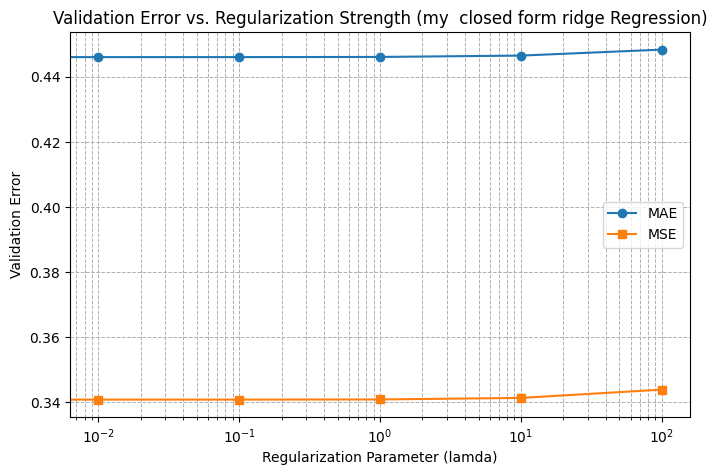

In [39]:
import matplotlib.pyplot as plt

results_df = results_df.sort_values(by="lambda")

plt.figure(figsize=(8, 5))
plt.plot(results_df["lambda"], results_df["MAE"], marker='o', label='MAE')
plt.plot(results_df["lambda"], results_df["MSE"], marker='s', label='MSE')

plt.xscale('log') 
plt.xlabel("Regularization Parameter (lamda)")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Regularization Strength (my  closed form ridge Regression)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


### sklearn closed form

In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

lambda_values = [0, 0.01, 0.1, 1, 10, 100]
results = []

for lam in lambda_values:
    model = Ridge(alpha=lam, solver='auto', random_state=42)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    
    results.append({
        "lambda": lam,
        "MAE": mae,
        "MSE": mse
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="MAE"))


   lambda       MAE       MSE
0    0.00  0.446011  0.340864
1    0.01  0.446012  0.340865
2    0.10  0.446017  0.340869
3    1.00  0.446066  0.340917
4   10.00  0.446482  0.341387
5  100.00  0.448314  0.343931


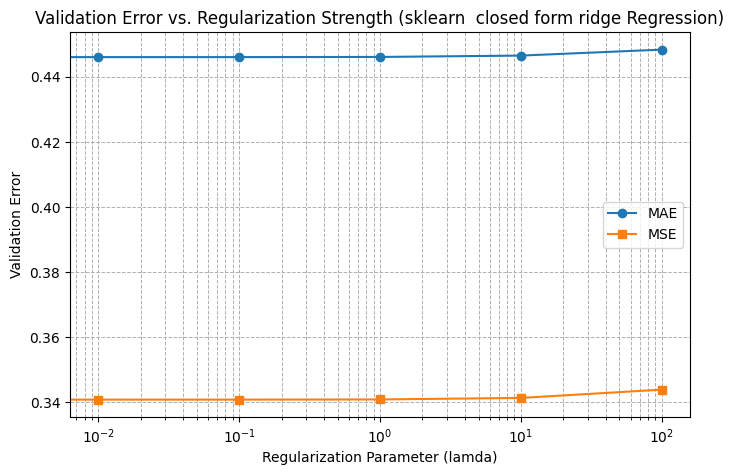

In [41]:
import matplotlib.pyplot as plt

results_df = results_df.sort_values(by="lambda")

plt.figure(figsize=(8, 5))
plt.plot(results_df["lambda"], results_df["MAE"], marker='o', label='MAE')
plt.plot(results_df["lambda"], results_df["MSE"], marker='s', label='MSE')

plt.xscale('log') 
plt.xlabel("Regularization Parameter (lamda)")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Regularization Strength (sklearn  closed form ridge Regression)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


### my lasso gd

In [42]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

lambda_values = [0, 0.01, 0.1, 1, 10, 100]
results = []

for lam in lambda_values:
    model =  linear_regression_gradient_descent_lasso(
    iterations=1000,
    learning_rate=0.1,
    lambda_param=lam 
)


    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    
    results.append({
        "lambda": lam,
        "MAE": mae,
        "MSE": mse
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="MAE"))


   lambda       MAE       MSE
0    0.00  0.448196  0.343543
1    0.01  0.448196  0.343543
2    0.10  0.448200  0.343547
3    1.00  0.448235  0.343585
4   10.00  0.448628  0.344039
5  100.00  0.450598  0.347565


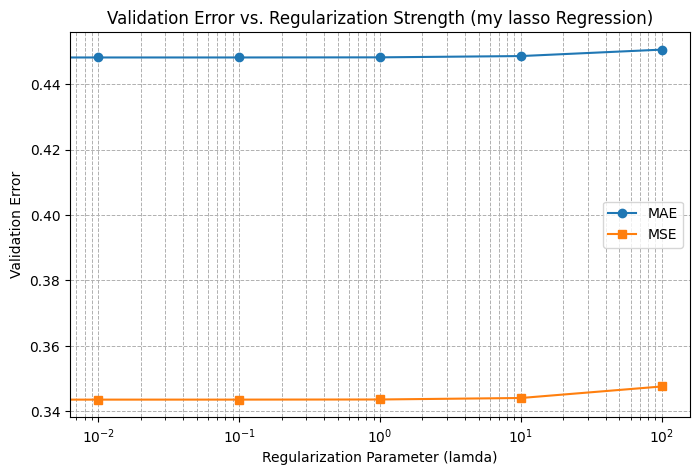

In [43]:
import matplotlib.pyplot as plt

results_df = results_df.sort_values(by="lambda")

plt.figure(figsize=(8, 5))
plt.plot(results_df["lambda"], results_df["MAE"], marker='o', label='MAE')
plt.plot(results_df["lambda"], results_df["MSE"], marker='s', label='MSE')

plt.xscale('log') 
plt.xlabel("Regularization Parameter (lamda)")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Regularization Strength (my lasso Regression)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


### sklearn lasso gd

In [44]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

lambda_values = [0, 0.01, 0.1, 1, 10, 100]
results = []

for lam in lambda_values:
    model =  SGDRegressor(
    max_iter=3000,
    tol=1e-3,
    penalty='l1',      
    alpha=lam,        
 
    random_state=42
)

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    
    results.append({
        "lambda": lam,
        "MAE": mae,
        "MSE": mse
    })


import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="MAE"))


   lambda       MAE       MSE
0    0.00  0.448132  0.344889
1    0.01  0.451100  0.351372
2    0.10  0.499110  0.441359
3    1.00  0.785651  0.985166
4   10.00  0.785651  0.985166
5  100.00  0.785651  0.985166


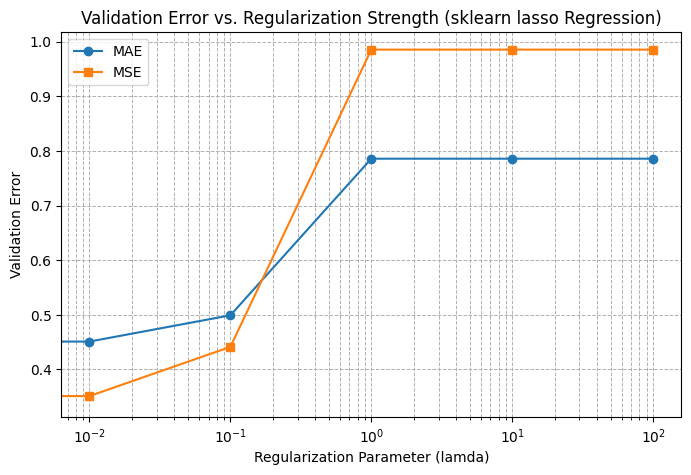

In [45]:
import matplotlib.pyplot as plt


results_df = results_df.sort_values(by="lambda")

plt.figure(figsize=(8, 5))
plt.plot(results_df["lambda"], results_df["MAE"], marker='o', label='MAE')
plt.plot(results_df["lambda"], results_df["MSE"], marker='s', label='MSE')

plt.xscale('log') 
plt.xlabel("Regularization Parameter (lamda)")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Regularization Strength (sklearn lasso Regression)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


### my ridge gd

In [46]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

lambda_values = [0, 0.01, 0.1, 1, 10, 100]
results = []

for lam in lambda_values:
    model =  linear_regression_gradient_descent_ridge(
    iterations=1000,
    learning_rate=0.1,
    lambda_param=lam
)

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    
    results.append({
        "lambda": lam,
        "MAE": mae,
        "MSE": mse
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="MAE"))


   lambda       MAE       MSE
0    0.00  0.448196  0.343543
1    0.01  0.448196  0.343543
2    0.10  0.448196  0.343543
3    1.00  0.448200  0.343550
4   10.00  0.448239  0.343617
5  100.00  0.448799  0.344518


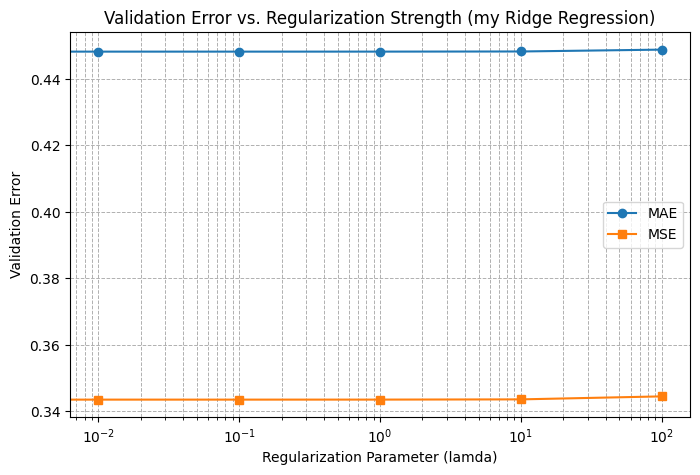

In [47]:
import matplotlib.pyplot as plt


results_df = results_df.sort_values(by="lambda")

plt.figure(figsize=(8, 5))
plt.plot(results_df["lambda"], results_df["MAE"], marker='o', label='MAE')
plt.plot(results_df["lambda"], results_df["MSE"], marker='s', label='MSE')

plt.xscale('log') 
plt.xlabel("Regularization Parameter (lamda)")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Regularization Strength (my Ridge Regression)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


### sklearn ridge gd

In [48]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

lambda_values = [0, 0.01, 0.1, 1, 10, 100]
results = []

for lam in lambda_values:
    model =   SGDRegressor(
    penalty='l2',        
    alpha=lam,          
    max_iter=1000, 
    random_state=42,
      
)


    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    
    results.append({
        "lambda": lam,
        "MAE": mae,
        "MSE": mse
    })


import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="MAE"))


   lambda       MAE       MSE
0    0.00  0.448132  0.344889
1    0.01  0.448736  0.346397
2    0.10  0.459004  0.366461
3    1.00  0.549406  0.518571
4   10.00  0.733879  0.866365
5  100.00  0.775629  0.962825


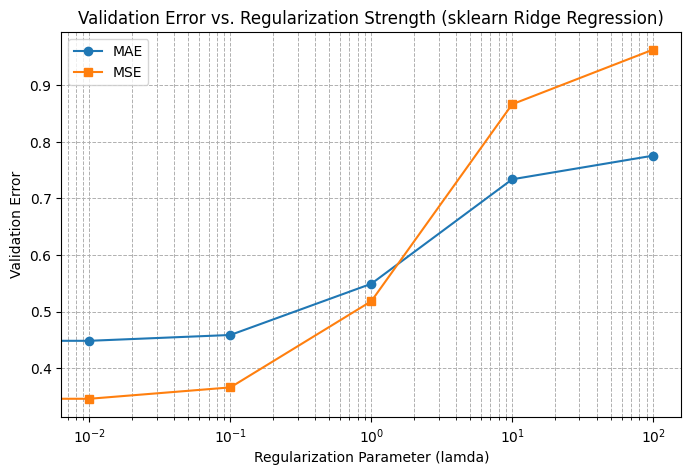

In [49]:
import matplotlib.pyplot as plt

results_df = results_df.sort_values(by="lambda")

plt.figure(figsize=(8, 5))
plt.plot(results_df["lambda"], results_df["MAE"], marker='o', label='MAE')
plt.plot(results_df["lambda"], results_df["MSE"], marker='s', label='MSE')

plt.xscale('log') 
plt.xlabel("Regularization Parameter (lamda)")
plt.ylabel("Validation Error")
plt.title("Validation Error vs. Regularization Strength (sklearn Ridge Regression)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


## Conclusion

### Our Pipeline

#### Data Preprocessing and Model Testing:
- We first performed data preprocessing and then tested our models. We compared the results with the corresponding implementations in scikit-learn.

#### Feature Selection Impact:
- For each model, we ran experiments twice: once using all features and once after removing highly correlated features. The results were very similar in both cases, indicating that the correlated features did not significantly affect model performance.

#### Hyperparameter Tuning (Regularization):
- We tuned the regularization parameter to optimize the models. The best performance was achieved with values around 0 or very small, suggesting that heavy regularization is unnecessary. Increasing regularization too much caused underfitting and reduced model performance.

#### Overfitting and Underfitting Insight:
- The training, validation, and test errors (MAE and MSE) are very close, indicating that the models are not overfitting. The average error of around 0.5 also suggests there is no clear underfitting, though performance could still be improved. We suspect that the data may contain non-linear patterns, so increasing the polynomial order could help the models capture these relationships and further reduce the error.